# <center>Area Under the Curve</center>
### <center>Calvin Chi</center>
AUC, short for area under the curve, is a measure of how good a classification algorithm performs in terms of sensitivity in light of the false positive rate. The curve under which the area is determined is the ROC curve, which stands for receiver operating characteristic. The receiver operating characteristic is a plot of the true positive rate against the false positive rate for various rejection thresholds. The name ROC bears more historic weight than it does its actual meaning, and more information on the history can be found [here](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).

To define the true positive rate (TPR) and false positive rate (FPR), first examine the following table:

|Condition A|Not condition A
-|-|-
Test results A|True Positive (TP)|False Positive (FP)
Test results not A|False Negative (FN)|True Negative (TN)

The TPR and FPR are then defined as follows: 
$$TPR(true\:positive\:rate) = \frac{TP}{TP + FN}$$
$$$$
$$FPR(false\:positive\:rate) = \frac{FP}{FP + TN}$$

The output of classification algorithms in machine learning are often probabilities that a sample belongs to a certain class. Classification is performed based off a rejection threshold. Knowing the true labels, one can then determine the TPR and FPR for the model under the threshold. For example, in a binary classification setting, the user could decide any probability values above 50% to be class 1 and any probability values below 50% to be class 0. On a ROC curve, this 50% threshold would then correspond to one point.

The area under the ROC curve gives a measure of how good the model is at detecting true positives at the expense of false positives. The objective is to build a model that can achieve a high TPR while maintaining a low FPR, the values of which are determined by the chosen rejection threshold. Hence, the larger the area under the ROC curve, the better the model is. Models that perform similarly to random guessing have AUCs close to 0.5 and possess a roughly linear ROC curve with slope 1 and intercept of 0, since the TPR is about the same as the FPR at every rejection threshold. 

To see how this works through an example, let us demonstrate calculations for a toy example: 

Predicted probability|True label
-|-
0.75|1
0.83|1
0.4|0
0.53|0
0.98|1
0.1|0
0.89|1
0.35|0

With a classification threshold of 0.5, the TPR and FPR would be calculated as follows: 

$$TPR = \frac{4}{4} = 1$$
$$FPR = \frac{1}{4} = 0.25$$

Let us now graph the ROC curve by generating predictions for 20 samples, where the true labels are 1 for the first 10 and 0 for the last 10 samples. In this tutorial, a good model should output probabilities close to 1 for samples of class 1 and probabilities close to 0 for samples of class 0. In this particular simulated dataset, samples of class 1 are assigned probabilities drawn from a $N(0.85, \sigma = 0.3)$ distribution and samples of class 0 are assigned probabilities drawn from a $N(0.15, \sigma = 0.3)$ distribution. 

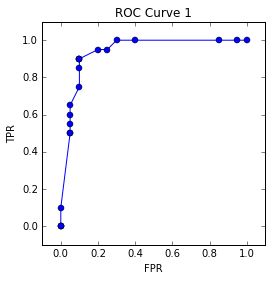

In [71]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)

num = 20
trueLabels = num*[1] + num*[0]
t = np.array([i if (i <= 1 and i>= 0) else 0.85 for i in np.random.normal(0.85, 0.3, num)])
f = np.array([i if (i <= 1 and i>= 0) else 0.15 for i in np.random.normal(0.15, 0.3, num)])
predict = np.concatenate([t, f])

def TPR_FPR(predict, trueLabels, cutoff): 
    tp = predict[np.where(predict[:num] >= cutoff)]
    fp = predict[np.where(predict[num:] >= cutoff)]
    pos = [x for x in trueLabels if x == 1]
    neg = [x for x in trueLabels if x == 0]
    tpr = tp.size / len(pos)
    fpr = fp.size / len(neg)
    result = [tpr, fpr]
    return result

TPRs = []
FPRs = []
for i in np.arange(0, 1.05, 0.05): 
    TPRs.append(TPR_FPR(predict, trueLabels, i)[0])
    FPRs.append(TPR_FPR(predict, trueLabels, i)[1])
plt.plot(FPRs, TPRs, "o-", color="blue")
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve 1")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Visually, the area under this ROC curve is close to 1, indicating that the model is capable of being sensitive to true positives while maintaining a low false positive rate. 

What does the ROC curve for a poor model look like? Let us generate sample predictions where the probability predictions for classes 1 and 2 are drawn from normal distributions with similar means. 

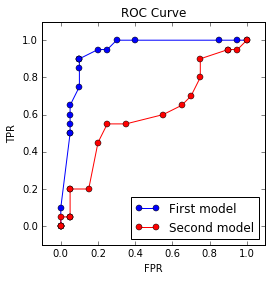

In [76]:
np.random.seed(2)
trueLabels = num*[1] + num*[0]
t = np.array([i if (i <= 1 and i>= 0) else 0.6 for i in np.random.normal(0.55, 0.3, num)])
f = np.array([i if (i <= 1 and i>= 0) else 0.4 for i in np.random.normal(0.45, 0.3, num)])
predict = np.concatenate([t, f])

TPRs2 = []
FPRs2 = []
for i in np.arange(0, 1.05, 0.05): 
    TPRs2.append(TPR_FPR(predict, trueLabels, i)[0])
    FPRs2.append(TPR_FPR(predict, trueLabels, i)[1])
    
plt.plot(FPRs, TPRs, "o-", color="blue", label="First model")
plt.plot(FPRs2, TPRs2, "o-", color="red", label="Second model")
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

It now becomes apparent that a good model should have a AUC close to 1 while a poor model should have a AUC close to 0.5, corresponding to the AUC of random classification. 

The AUC has a mathematical formulation. Let $m^{+}$ be number of cases and $m^{-}$ be number of controls. Let $\hat{y_{j}^{+}}$ be the predicted probability of being a case for a randomly selected case and let $\hat{y_{k}^{-}}$ be the predicted probability of being a case for a randomly selected control. Let $g()$ be a function such that:

$$g(x)=\begin{cases}
    0, & \text{if $x < 0$}\\
    0.5, & \text{if $x = 0$}\\
    1, & \text{if $x > 0$}
  \end{cases}$$
  
Then the mathematical formulation of AUC is as follows:

$$AUC = \frac{1}{m^{+}m^{-}}\sum_{j=1}^{m^{+}}\sum_{k=1}^{m^{-}}g(\hat{y_{j}^{+}} - \hat{y_{k}^{-}})$$

In this formulation, the predicted probability of being a case for each randomly selected case is compared with the probability of being a case for a randomly selected control for every control. A perfect classifier would assign a higher probability of being a case for every case compared to controls, yielding a AUC of 1. The fraction $\frac{1}{m^{+}m^{-}}$ serves to constrain the AUC between 0 and 1. Note that a AUC less than 0.5 means that on average, cases are categorized as controls more. When the AUC is less than 0.5, then a simple fix would be to switch the predicted label.